In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/verlo/dev_ws/EDA/data',
         'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options=options)
driver.get(url)

In [2]:
driver.get(url)

In [3]:
from selenium.webdriver.common.by import By

sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ", " + sido_name.get_attribute("value"))

0, 
1, 서울특별시
2, 부산광역시
3, 대구광역시
4, 인천광역시
5, 광주광역시
6, 대전광역시
7, 울산광역시
8, 세종특별자치시
9, 경기도
10, 강원특별자치도
11, 충청북도
12, 충청남도
13, 전북특별자치도
14, 전라남도
15, 경상북도
16, 경상남도
17, 제주특별자치도


In [4]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [5]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [6]:
len(sido_names)

17

In [7]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [8]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [9]:
gu_names.remove('')
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [10]:
gu.send_keys(gu_names[15])

In [11]:
import time
from tqdm.notebook import tqdm

for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    time.sleep(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
import time
from tqdm.notebook import tqdm

for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
driver.find_element(By.XPATH, """//*[@id="glopopd_excel"]""").click()

In [14]:
for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)

    driver.find_element(By.XPATH, """//*[@id="glopopd_excel"]""").click()

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
from glob import glob

len(glob("../data/지역_*"))

49

In [16]:
import os

for file in glob("../data/지역_*"):
    os.remove(file)

len(glob("../data/지역_*"))

0

In [17]:
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [18]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)

    save = WebDriverWait(driver, timeout=30).until(EC.element_to_be_clickable((By.XPATH, """//*[@id="glopopd_excel"]""")))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)

    time.sleep(4)

len(glob("../data/지역_*"))

  0%|          | 0/25 [00:00<?, ?it/s]

25

In [19]:
from glob import glob

file_list = glob("../data/지역_*")
print(len(file_list))
file_list

25


['../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (11).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (3).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (20).xls']

In [20]:
driver.close()

In [21]:
import pandas as pd

data = pd.read_excel(file_list[0], header=2)
data.tail(2)

/tmp/ipykernel_17126/2860509272.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
26,서울특별시,HD현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),HD현대오일뱅크,02-448-9804,Y,1819,1718,1628,-
27,서울특별시,대신석유(주)진양주유소,서울 송파구 올림픽로 499 (풍납동),SK에너지,02-477-1906,N,1998,1898,1798,-


In [22]:
data_list = []

for file in file_list:
    data = pd.read_excel(file, header=2)
    data_list.append(data)

oil_data = pd.concat(data_list)
len(oil_data)

439

In [23]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 0 to 11
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      439 non-null    object
 1   상호      439 non-null    object
 2   주소      439 non-null    object
 3   상표      439 non-null    object
 4   전화번호    439 non-null    object
 5   셀프여부    439 non-null    object
 6   고급휘발유   439 non-null    object
 7   휘발유     439 non-null    object
 8   경유      439 non-null    object
 9   실내등유    439 non-null    object
dtypes: object(10)
memory usage: 37.7+ KB


In [24]:
oil_data = pd.DataFrame({"상호": oil_data["상호"],
                         "주소": oil_data["주소"],
                         "가격": oil_data["휘발유"],
                         "셀프": oil_data["셀프여부"],
                         "상표": oil_data["상표"]})
oil_data.tail()

,상호,주소,가격,셀프,상표
7,(주)남경주유소,서울 용산구 녹사평대로11길 24,2179,N,SK에너지
8,에너비스,서울 용산구 한남대로 82 (한남동),2267,N,SK에너지
9,한남지점,서울 용산구 한남대로21길 4 (한남동),2267,N,SK에너지
10,한석주유소,서울 용산구 이촌로 164,2295,N,SK에너지
11,서계주유소,서울 용산구 청파로 367 (청파동),2699,N,GS칼텍스


In [25]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.tail()

,상호,주소,가격,셀프,상표
434,(주)남경주유소,서울 용산구 녹사평대로11길 24,2179,N,SK에너지
435,에너비스,서울 용산구 한남대로 82 (한남동),2267,N,SK에너지
436,한남지점,서울 용산구 한남대로21길 4 (한남동),2267,N,SK에너지
437,한석주유소,서울 용산구 이촌로 164,2295,N,SK에너지
438,서계주유소,서울 용산구 청파로 367 (청파동),2699,N,GS칼텍스


In [26]:
oil_data["구"] = [address.split()[1] for address in oil_data["주소"]]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,한강에너지(주)퍼스트주유소,서울 송파구 삼학사로 22 (석촌동),1623,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1633,Y,S-OIL,송파구
2,지에스칼텍스(주)스마트위례주유소,서울 송파구 위례중앙로 43 (장지동),1633,Y,GS칼텍스,송파구
3,상아주유소,서울 송파구 거마로 82,1633,Y,S-OIL,송파구
4,지에스칼텍스(주)가든파이브주유소,서울 송파구 탄천동로 740,1633,Y,GS칼텍스,송파구


In [27]:
oil_data["구"].unique(), len(oil_data["구"].unique())

(array(['송파구', '양천구', '구로구', '중랑구', '강남구', '종로구', '동대문구', '관악구', '성북구',
        '강동구', '동작구', '은평구', '영등포구', '강서구', '서초구', '광진구', '중구', '마포구',
        '성동구', '금천구', '도봉구', '노원구', '강북구', '서대문구', '용산구'], dtype=object),
 25)

In [28]:
oil_data[oil_data["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
141,(주)안국에너지 삼원셀프주유소,서울 동대문구 망우로 90 (휘경동),-,Y,SK에너지,동대문구
320,태양주유소,서울 광진구 동일로 345 (중곡동),-,N,HD현대오일뱅크,광진구


In [29]:
oil_data = oil_data[oil_data["가격"] != "-"]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,한강에너지(주)퍼스트주유소,서울 송파구 삼학사로 22 (석촌동),1623,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1633,Y,S-OIL,송파구
2,지에스칼텍스(주)스마트위례주유소,서울 송파구 위례중앙로 43 (장지동),1633,Y,GS칼텍스,송파구
3,상아주유소,서울 송파구 거마로 82,1633,Y,S-OIL,송파구
4,지에스칼텍스(주)가든파이브주유소,서울 송파구 탄천동로 740,1633,Y,GS칼텍스,송파구


In [30]:
oil_data["가격"] = oil_data["가격"].astype("float")

In [31]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 438
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      437 non-null    object 
 1   주소      437 non-null    object 
 2   가격      437 non-null    float64
 3   셀프      437 non-null    object 
 4   상표      437 non-null    object 
 5   구       437 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.9+ KB


In [32]:
oil_data

,상호,주소,가격,셀프,상표,구
0,한강에너지(주)퍼스트주유소,서울 송파구 삼학사로 22 (석촌동),1623.0,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1633.0,Y,S-OIL,송파구
2,지에스칼텍스(주)스마트위례주유소,서울 송파구 위례중앙로 43 (장지동),1633.0,Y,GS칼텍스,송파구
3,상아주유소,서울 송파구 거마로 82,1633.0,Y,S-OIL,송파구
4,지에스칼텍스(주)가든파이브주유소,서울 송파구 탄천동로 740,1633.0,Y,GS칼텍스,송파구
...,...,...,...,...,...,...
434,(주)남경주유소,서울 용산구 녹사평대로11길 24,2179.0,N,SK에너지,용산구
435,에너비스,서울 용산구 한남대로 82 (한남동),2267.0,N,SK에너지,용산구
436,한남지점,서울 용산구 한남대로21길 4 (한남동),2267.0,N,SK에너지,용산구
437,한석주유소,서울 용산구 이촌로 164,2295.0,N,SK에너지,용산구


In [33]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,한강에너지(주)퍼스트주유소,서울 송파구 삼학사로 22 (석촌동),1623.0,Y,SK에너지,송파구
1,위례제일주유소 (주)버드에너지,서울 송파구 위례서로 260,1633.0,Y,S-OIL,송파구
2,지에스칼텍스(주)스마트위례주유소,서울 송파구 위례중앙로 43 (장지동),1633.0,Y,GS칼텍스,송파구
3,상아주유소,서울 송파구 거마로 82,1633.0,Y,S-OIL,송파구
4,지에스칼텍스(주)가든파이브주유소,서울 송파구 탄천동로 740,1633.0,Y,GS칼텍스,송파구


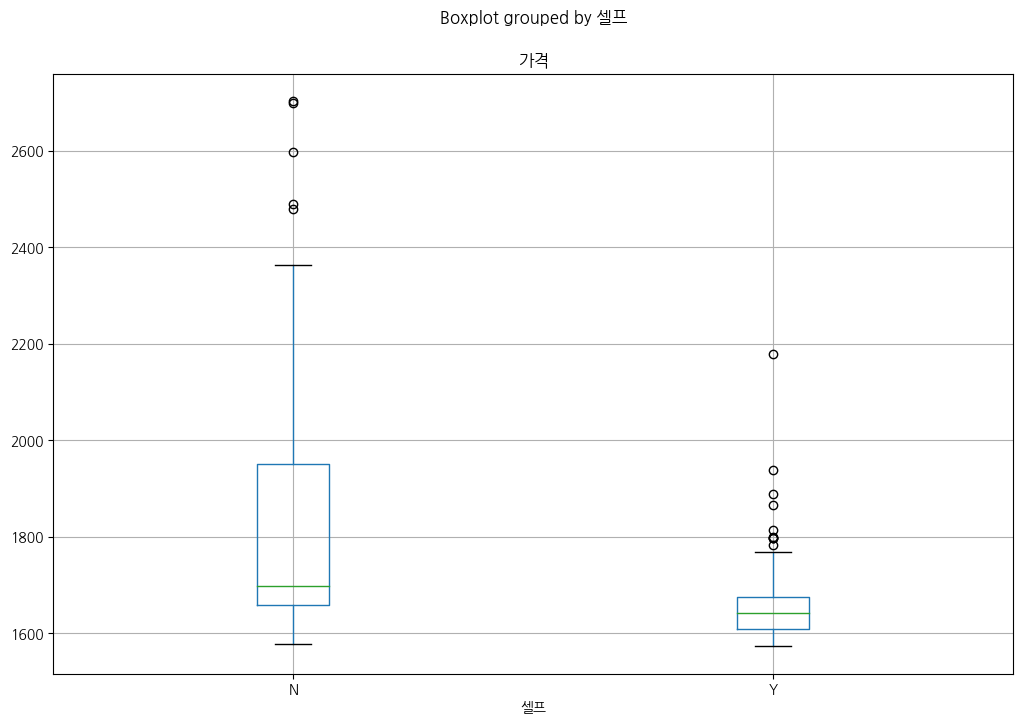

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

oil_data.boxplot(column="가격", by="셀프", figsize=(12,8));

/tmp/ipykernel_17126/1403898688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="셀프", y="가격", data=oil_data, palette="Set1")


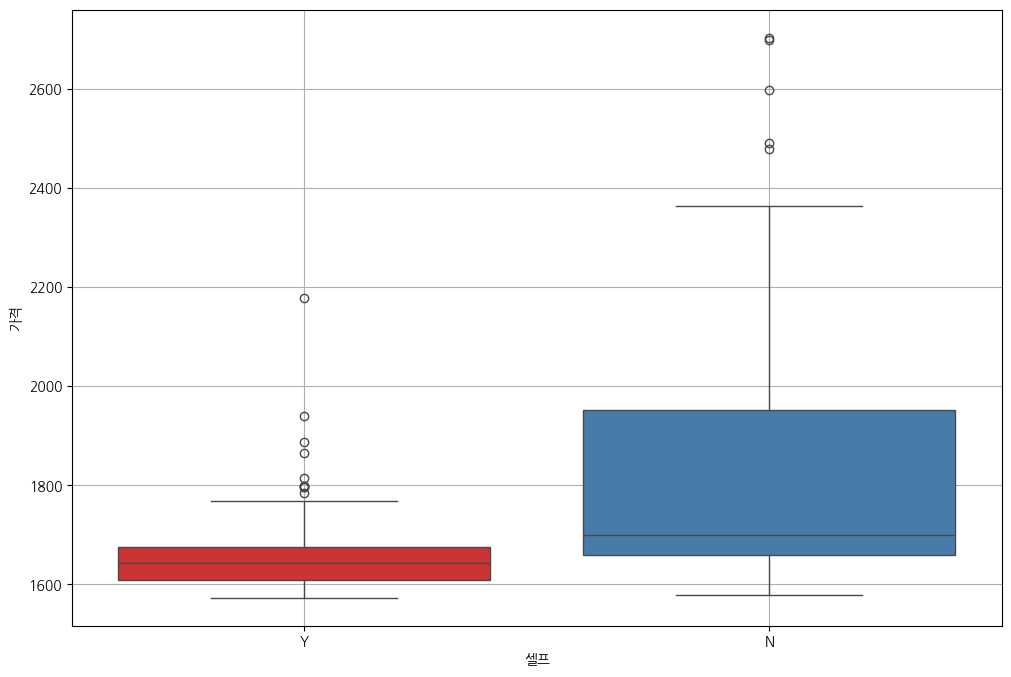

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="셀프", y="가격", data=oil_data, palette="Set1")
plt.grid(True)
plt.show()

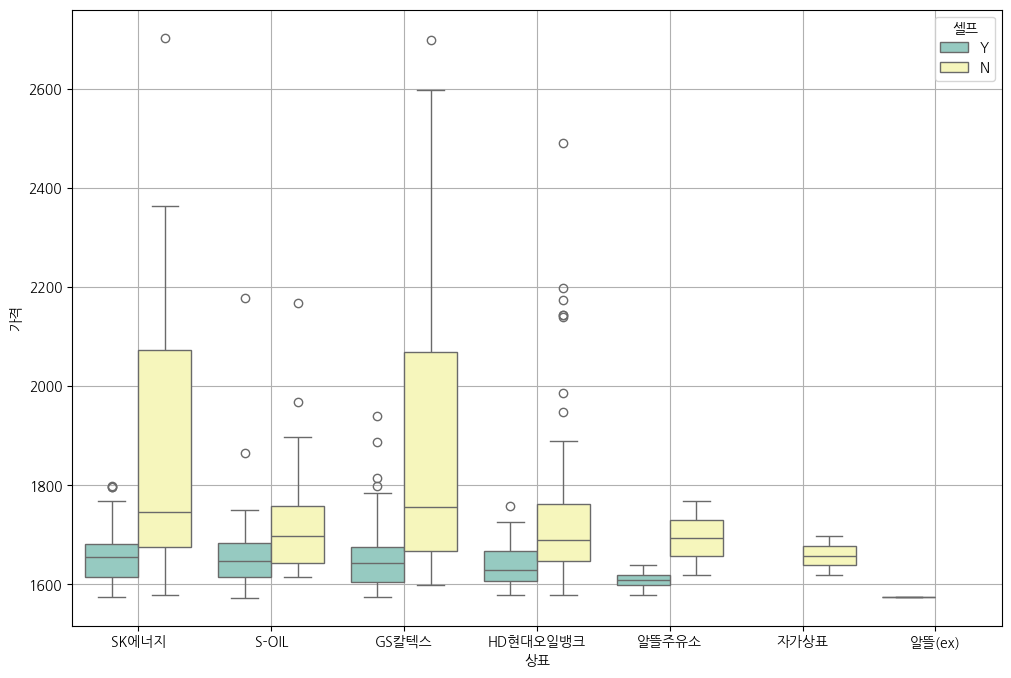

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=oil_data, palette="Set3")
plt.grid(True)
plt.show()

In [37]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [38]:
oil_data.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
328,서남주유소,서울 중구 통일로 30,2703.0,N,SK에너지,중구
436,서계주유소,서울 용산구 청파로 367 (청파동),2699.0,N,GS칼텍스,용산구
114,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
113,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2490.0,N,HD현대오일뱅크,강남구
327,필동주유소,서울 중구 퇴계로 196 (필동2가),2479.0,N,GS칼텍스,중구
112,SK논현주유소,서울 강남구 논현로 747 (논현동),2363.0,N,SK에너지,강남구
123,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2295.0,N,GS칼텍스,종로구
242,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
435,한석주유소,서울 용산구 이촌로 164,2295.0,N,SK에너지,용산구
122,경복궁주유소,서울 종로구 율곡로 6 (중학동),2290.0,N,GS칼텍스,종로구


In [39]:
oil_data.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
341,(주)서울에너지 직영,서울 성동구 천호대로 324 (용답동),1573.0,Y,S-OIL,성동구
29,플라트(주)서호주유소,서울 양천구 남부순환로 317,1574.0,Y,GS칼텍스,양천구
30,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1574.0,Y,SK에너지,양천구
28,신월주유소,서울 양천구 신월로 193 (신월동),1574.0,Y,GS칼텍스,양천구
276,만남의광장주유소,서울 서초구 양재대로12길 73-71,1575.0,Y,알뜰(ex),서초구
201,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1579.0,N,HD현대오일뱅크,은평구
31,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1579.0,N,SK에너지,양천구
32,현대주유소,서울 양천구 남부순환로 372 (신월동),1579.0,Y,S-OIL,양천구
243,화곡역주유소,서울 강서구 강서로 154 (화곡동),1579.0,Y,알뜰주유소,강서구
244,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1579.0,Y,HD현대오일뱅크,강서구


In [40]:
import numpy as np

gu_data = pd.pivot_table(data=oil_data, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1913.781250
강동구,1735.785714
강북구,1615.250000
강서구,1669.484848
관악구,1695.928571


In [41]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
folium.Choropleth(geo_data=geo_str,
                  data=gu_data,
                  columns=[gu_data.index, '가격'],
                  key_on='feature.id',
                  fill_color='PuRd').add_to(map)
                              
map

In [42]:
folium.Choropleth(geo_data=geo_str,
                  data=gu_data,
                  columns=[gu_data.index, '가격'],
                  key_on='feature.id',
                  fill_color='PuRd').add_to(map)
                              
map